In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [2]:
# Importing Libraries
import matplotlib.pyplot as plt
import seaborn as sns

 # Data Preprocessing and EDA of Ipl DataSet

In [3]:
df=pd.read_csv('matches.csv')


- First Five DataSet

In [4]:
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


- Last five Dataset

In [5]:
df.tail()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin
755,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong


In [6]:
df['result'].unique()

array(['normal', 'tie', 'no result'], dtype=object)

- **Assessment of Data**

In [67]:
# Checking rows and columns
df.shape

(756, 18)

In [68]:
# Checking information od data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [69]:
# Changing dtype 
df['toss_decision']=df['toss_decision'].astype('category')
df['result']=df['result'].astype('category')

In [70]:
df.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [71]:
df.corr(method='pearson', min_periods=1)

,id,dl_applied,win_by_runs,win_by_wickets
id,1.000000,-0.011658,-0.039403,-0.012239
dl_applied,-0.011658,1.000000,-0.016349,-0.011631
win_by_runs,-0.039403,-0.016349,1.000000,-0.560420
win_by_wickets,-0.012239,-0.011631,-0.560420,1.000000


- Missing values present in city,winner,player_of_match,umpire1,umpire2,umpire3
- Since umpire3 ,umpire1, umpire2 ,date,city,,id have no use in our analysis.So,drop it.

In [72]:
# Filling missing values
df['winner']=df['winner'].fillna('Rising Pune Supergiants')
df['player_of_match']=df['player_of_match'].fillna('CH Gayle')


In [73]:
df.drop(columns={'umpire3','umpire1','umpire2','date','city','id'},inplace=True)

In [74]:
df.duplicated().sum()

0

In [75]:
df.head()

,Season,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,IPL-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,IPL-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,IPL-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,IPL-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,IPL-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium


**Checking Consistency in names of team**

In [76]:
df['winner']=df['winner'].replace('Rising Pune Supergiant','Rising Pune Supergiants')

# `EDA`

**Number of Matches played in each Season**

Text(0.5, 1.0, 'Number of Matches  vs  Season')

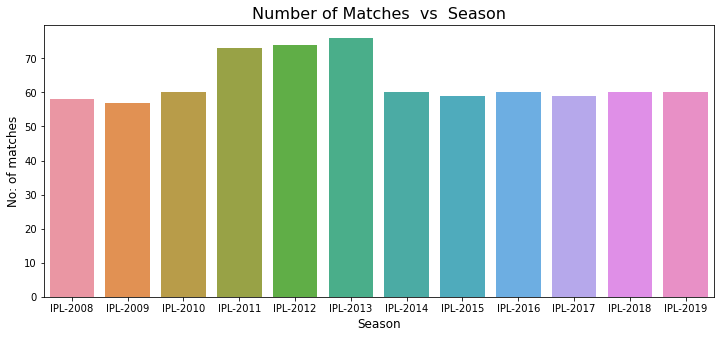

In [77]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['Season'],order=df['Season'].value_counts().index.sort_values())
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of Matches  vs  Season',fontsize=16)

**Number of matches won by the teams**

Text(0.5, 1.0, 'Number of Matches won  vs  Teams')

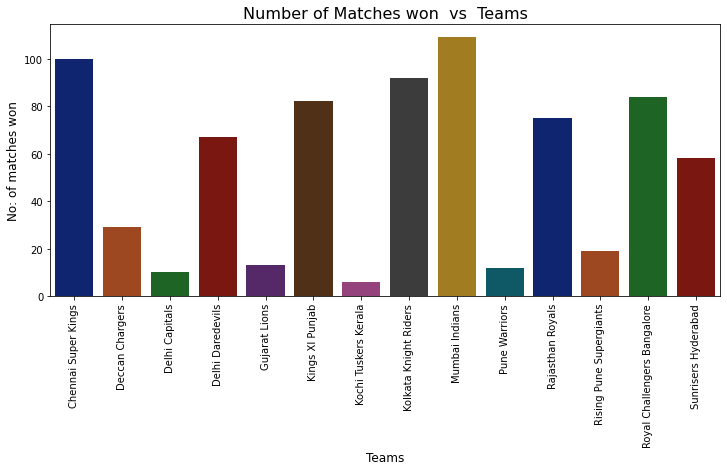

In [78]:
plt.figure(figsize=(12,5))
sns.countplot(x=df['winner'],order=df['winner'].value_counts().index.sort_values(),palette='dark')
plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=12)
plt.ylabel('No: of matches won',fontsize=12)
plt.title('Number of Matches won  vs  Teams',fontsize=16)

- MI wons maximum number of matches including all the seasons

**Toss_Decision**

([<matplotlib.patches.Wedge at 0x291379686d0>,
 [Text(-0.3805142883934777, 1.032089567977705, 'field'),
  Text(0.3805142883934778, -1.032089567977705, 'bat')],
 [Text(-0.20755324821462415, 0.5629579461696571, '61.24%'),
  Text(0.20755324821462423, -0.5629579461696571, '38.76%')])

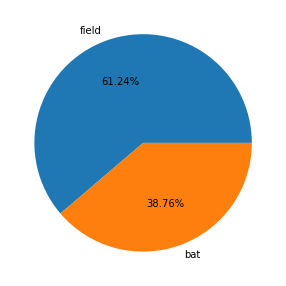

In [79]:

plt.figure(figsize=(12,5))
plt.pie(df['toss_decision'].value_counts(),
        labels=df['toss_decision'].value_counts().index,autopct='%1.2f%%')

- 61.24% times teams choses field after winning the toss

**Venue Of Matches**

Text(0.5, 1.0, 'Number of Matches Played vs  Stadiums')

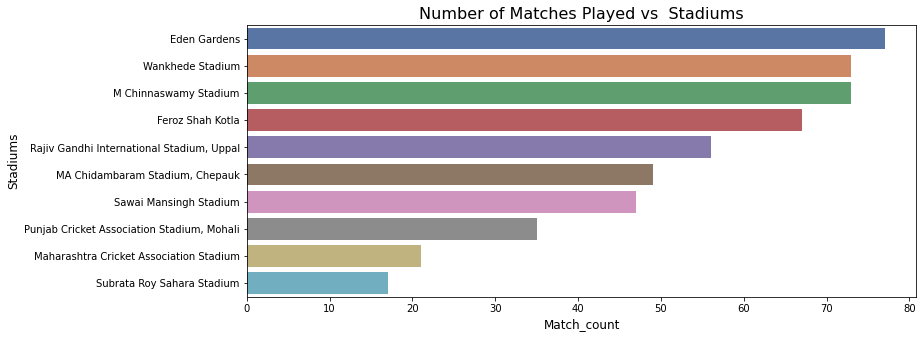

In [80]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['venue'],order=df['venue'].value_counts().index[0:10],palette='deep')
plt.xlabel('Match_count',fontsize=12)
plt.ylabel('Stadiums',fontsize=12)
plt.title('Number of Matches Played vs  Stadiums',fontsize=16)

- Most of the matches played in Eden Gardens and Feroz Shah Kotla

In [81]:
batting_first=df[df['win_by_runs']!=0]
batting_first['winner'].value_counts()[0:5]
df[df['win_by_runs']!=0]['winner'].value_counts().index[0:5]

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kings XI Punjab',
       'Kolkata Knight Riders', 'Royal Challengers Bangalore'],
      dtype='object')

**Batting_first**

Text(0.5, 1.0, 'Teams vs won_during_bat_first')

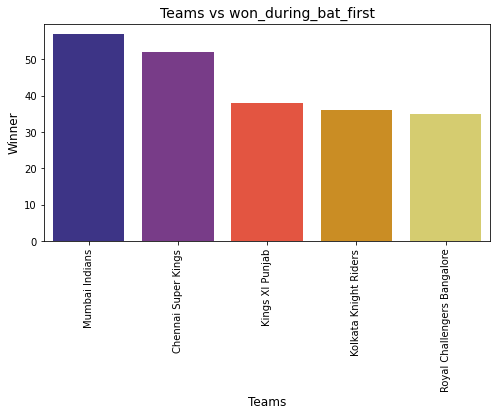

In [82]:
plt.figure(figsize=(8,4))
sns.barplot(x=df[df['win_by_runs']!=0]['winner'].value_counts().index[0:5],
                                    y=batting_first['winner'].value_counts()[0:5],palette='CMRmap')

plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=12)
plt.ylabel('Winner',fontsize=12)
plt.title('Teams vs won_during_bat_first',fontsize=14)

- Mumbai Indians won maximum number of matches,when they bat first

In [83]:
batting_Second=df[df['win_by_wickets']!=0]
batting_Second['winner'].value_counts()[0:5]
df[df['win_by_wickets']!=0]['winner'].value_counts().index[0:5]


Index(['Kolkata Knight Riders', 'Mumbai Indians', 'Chennai Super Kings',
       'Royal Challengers Bangalore', 'Rajasthan Royals'],
      dtype='object')

**Batting_Second**

Text(0.5, 1.0, 'Teams vs won_during_Chasing')

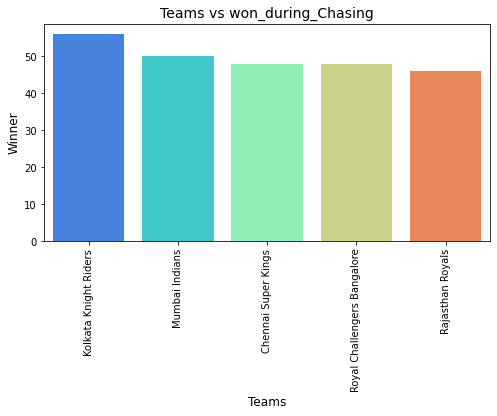

In [84]:
plt.figure(figsize=(8,4))
sns.barplot(x=df[df['win_by_wickets']!=0]['winner'].value_counts().index[0:5],
                                    y=batting_Second['winner'].value_counts()[0:5],palette='rainbow')

plt.xticks(rotation='vertical')
plt.xlabel('Teams',fontsize=12)
plt.ylabel('Winner',fontsize=12)
plt.title('Teams vs won_during_Chasing',fontsize=14)

- KKR won maximum number of matches while chasing.

**Player_of_match**

Text(0.5, 1.0, 'Player_of_match vs Players')

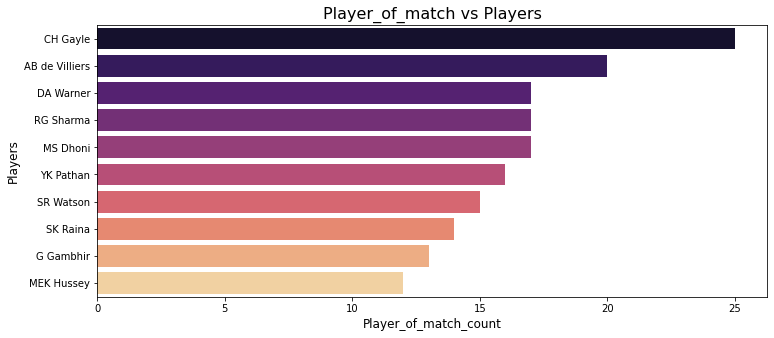

In [85]:
plt.figure(figsize=(12,5))
sns.countplot(y=df['player_of_match'],order=df['player_of_match'].value_counts().index[0:10],palette='magma')
plt.xlabel('Player_of_match_count',fontsize=12)
plt.ylabel('Players',fontsize=12)
plt.title('Player_of_match vs Players',fontsize=16)

- Chris Gayle and AB de Villers won most of the player of match titles including all seasons.